# Random Forest - Classification

In [1]:
#eval metric kod satirinda orda y_train,y_train_pred ile kiyaslayip.Train test 

In [2]:
#Treebase modellerde encoder yapiyoruz,ge_dummies degil 

In [3]:
#bootstrapt arastir 

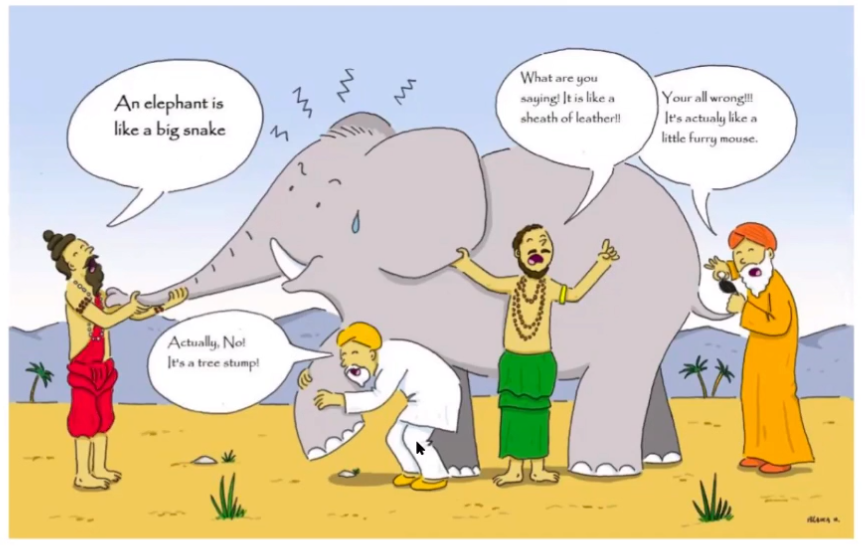

In [4]:
#burda filimiz data ,insanlarda estimator modellerimiz,bunlar bir araya gelerek ensamble Learning oluyor

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df = pd.read_csv("penguins_size.csv")

In [7]:
df = df.dropna()
df.head()

#burda dropna yapalim dedik

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Exploratory Data Analysis and Visualization

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.describe().T

#birde boxplot ile veriye bakip,outlierlara bakmaliyiz
#

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [10]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

        #sütun  isimlerinde bosluk varmi diye baktik
        #yani herbirinin unique degerlerini yazdiriyoruz

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [11]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df[df.species =="Gentoo"].groupby("sex").describe().T

#Gentoo ya ait oldugu icin,bunun Male mi.Famale grubuna mi ait oldugunu tahmin ediyoruz
#bunun kücük bir erkek olduguna karar verdik.
#nokta sütünu var,1 tane oldugu icin count 1 oluyor.culmenlength'de min=44.5 ve male'dede yakin deger
#culmen depth'de male ola gruba cok yakin

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [13]:
df.loc[336, "sex"] = "MALE"

#male yapalim dedik

In [14]:
df["species"].value_counts()

#hemen imbalance diyemiyoruz scorelari görmeden önce,haa evet belki imbalance olabilir diyebiliriz
#imbalance oldugu zaman predict scorlarini degerlendirirkende dikkat edecegiz


Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

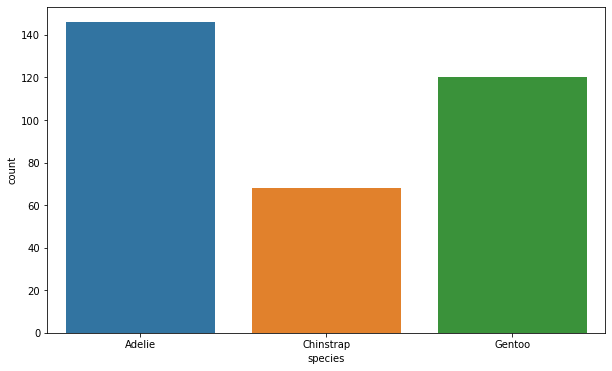

In [15]:
sns.countplot(x="species", data = df);

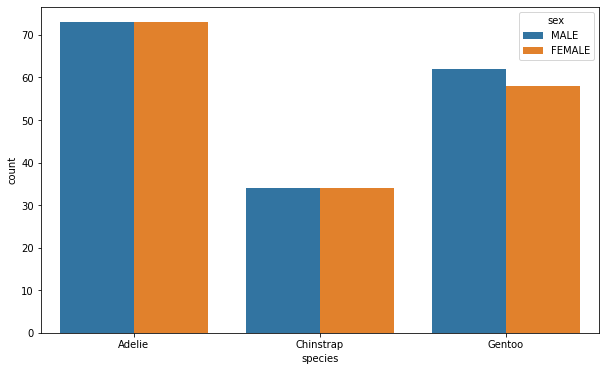

In [16]:
sns.countplot(x="species", data = df, hue = "sex");

#countplotada hue yapabiliyoruz

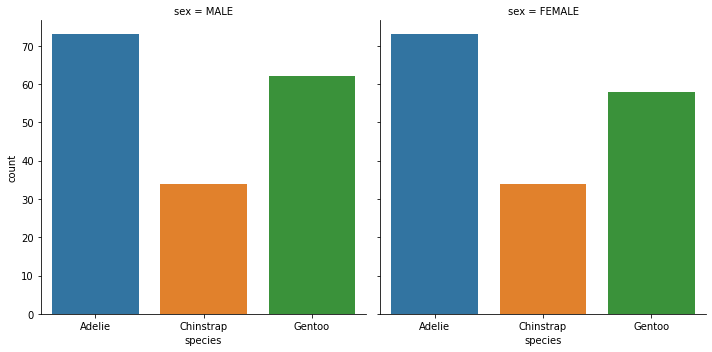

In [17]:
sns.catplot(x='species', data=df, kind='count',col='sex')

In [18]:
#Decision trede get dummies yapmistik,
#Random foreste ise encoder islemi kullanacagiz,o-1-0 demiyor, birine 0,digerine 1,digerine 2 diyor

#Tree base modellerde encoder tavsiye edilir,digerlerinde dummies yapilmasi tavsiye edilir

<Figure size 864x432 with 0 Axes>

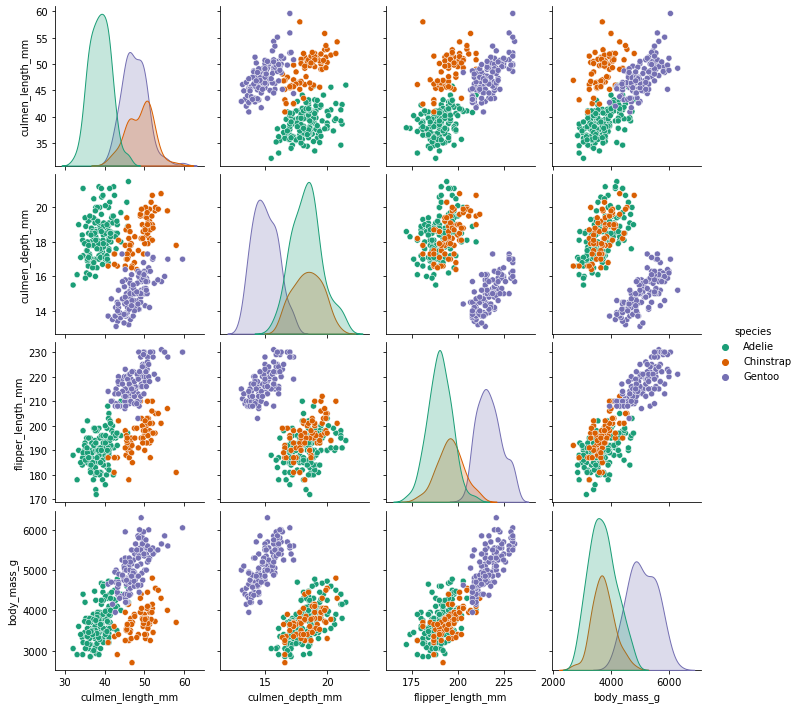

In [19]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2');

In [20]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


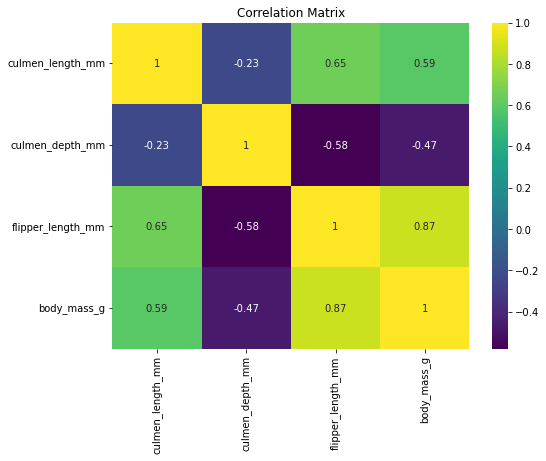

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

#corr matrise bakalim dedik

In [22]:
#Label encoderda featureslere tek tek uyguluyoruz, ordinal encoder ise,otomatikmen uyguluyor,ama bu ne anlama geliyor anlamadim

## Ordinal Encoder

In [23]:
#Ordinal encoder ve Label encoder farki var, ama ordinal encoder daha cok tavsiye ediliyor
# bes kategorik features olsun,9 featuresten, Ordinal encoder categorikleri kendi icinde kategorik yapar 

#Label encoder ise birbirinden bagimsiz bir sekilde 0,1,2,3, diye numaralandirma yapar

https://bookdown.org/max/FES/categorical-trees.html

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

In [24]:
#Encoder kategorik ve metinselleri numerik yapiyor,Tree base modellerde encoder yapiyoruz
#dummies modeli komplex hale getiriyor, Tree base modeller icin uygun degil,encoder ise burda ise numaralandirma yapiyor,

get_dummies ile kategorik fetaures lar binary sistemde fetaures oluşturarak yani \ 
fetaure arttırımında bulunarak çözüm sağlar Encoder ise kategorik fetauresları  \ 
yeni fetaures lar oluşturmadan aynı fetaures ın kategorik değerlerini numeric olarak değiştirir. \
tree based modellerde kategorik fetaures larda eğer bir hiyerarşik durum yok ise get_dummies \ 
ile dönüştürüyorduk fakat get_dummies ile fetaures sayısı arttığından complexity artar.fetaureimportance \
ın yanlış belirlenmesinede neden olur. encoder tree based modellerde uygulanması açısından başarılıdır.\
 features sayısı artmadığı için complexity azalır. tree based modellerde encoder daha başarılı \
  score lar almamızı sağlar. Features sayısı artmadığı için encoder yapmak yaplıacak işlemin daha \
   kısa sürmesini sağlar iş maliyeti açısından da daha faydalı. label ve ordinal encoder \
    çeşitleri vardır. label encoder ile seçilen kategorik feature encoder yapılırken \
    ordinal encoder ile tüm kategorik fetaures lar encoder yapılır. \
ENCODER SADECE TREE BASED MODELLERDE KULLANILIR. diğer modeller arka planda istatistiksel \
dönüşümler yaptığı için encoder kullanılmaz. kategorik veriler get_dummies ile dönüştürülür bu modellerde.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
data = {"animal": ["cat", "dog", "horse", "lion", "tiger"]}     # Egitilen data
predict = {"animal": ["lion", "horse",'cat']}      # Tahminlerin alinacagi data

In [27]:
data = pd.DataFrame(data)
data

#burda encoder bu sekilde yapiyor
#bunlari asagida numarandiracak

,animal
0,cat
1,dog
2,horse
3,lion
4,tiger


In [28]:
#Encoder yapinca komlexisty artmiyor, get dummieste artiyor
#

In [29]:
predict = pd.DataFrame(predict)
predict

,animal
0,lion
1,horse
2,cat


In [30]:
encoder = OrdinalEncoder()
encoder.fit_transform(data)    
# Butun dataya uygulandi.ve numaralandirma yapti,burda Train diye düsünme
#burda ordinal encoderla yaptigi icin kendi icinde bir hiyerarsiye ayiriyor
#burda fit_transform yaptik ama bundan sonra biz gelen datayi sadece transform yani dönüstürme islemi uygulayacaz,
#cünkü fit islemi bir kere yapilir

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [31]:
encoder.transform(predict)  #modele sonradan predict yapmasi icin 
#yukarda tanimladigi predict dictinory yi encoder yapti
#neyi encoder yapmak isterse buraya onu yazacagiz

#normalde lion d4cüydü yukarda ama burda 3cü yapmis

array([[3.],
       [2.],
       [0.]])

In [32]:
#Fit edip modeli eğitmek bir kere olur.
#Model eğitildikten sonra eğitilmiş modelinle istediğin kadar datayı transform edebilirsin

## Train | Test Split

In [33]:
X = df.drop('species',axis=1)
y = df['species']

In [34]:
cat = X.select_dtypes("object").columns   #cat degiskenimiz
cat
# object columnslari atadik

Index(['island', 'sex'], dtype='object')

In [35]:
X[cat]

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
4,Torgersen,FEMALE
5,Torgersen,MALE
...,...,...
338,Biscoe,FEMALE
340,Biscoe,FEMALE
341,Biscoe,MALE
342,Biscoe,FEMALE


burda Encoder yapma syntexi var

In [36]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])  #cat x icindeki kategorik katsayi,kendisini encoder yapilmis haline esitliyoruz,baska isimde olur
X.head()

# genel kural btün kategorik datayı numeriğe çevirmemeiz gerekir. bütün data daki kategorikleri numeriğe çevirir.
#istatistik islem yapan modellerde dummies yapmak gerekiyor,sadece TREE modellerde Encoder kullan

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,39.1,18.7,181.0,3750.0,1.0
1,2.0,39.5,17.4,186.0,3800.0,0.0
2,2.0,40.3,18.0,195.0,3250.0,0.0
4,2.0,36.7,19.3,193.0,3450.0,0.0
5,2.0,39.3,20.6,190.0,3650.0,1.0


Şöyle açıklanmış : Mesela train setimizin color feature'ında 3 çeşit renk olsun, Mavi,Kırmızı,Yeşil. Train setini get dummies yaptığımız zaman her kategori için bir feature daha oluşacak ve 3 tane ekstradan feature oluşmuş olacak. Fakat trainin ardından test için sokacağımız datalarda mesela color çeşitleri 2 tane olsun. Sadece Mavi ve Kırmızı. Yeşilden hiç olmasın. Test setine dummies yaptığımızda 3 değil 2 tane daha ekstradan feature oluşacak. Ve test setini modele sokarken feature sayıları eşleşmediği için hata verecek

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Modelling and Model Performance

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))  # bu genis 
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

    

### Decision Tree

In [40]:
#bir DT yapalim dedik

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [42]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

# encoder yaptığımızda sonuçlar daha iyi çıktı  

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



__Cross Validate__

In [43]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [44]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.974457
test_precision_micro    0.974457
test_recall_micro       0.974457
test_f1_micro           0.974457
dtype: float64

### DT Model Feature Importance

In [45]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,#bu kelime önemli features importance
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp


#encoder Ridge gibi calisti, her featuresten biraz aliyor

#DT de lasso gibi RF da ridge gibi demiştiniz

,Feature Importance
flipper_length_mm,0.531201
culmen_length_mm,0.336093
island,0.084673
body_mass_g,0.028136
sex,0.010853
culmen_depth_mm,0.009044


In [46]:
#bu ikisinin degerlerine bakabilirizalttaki DT de yaptigimiz degerler

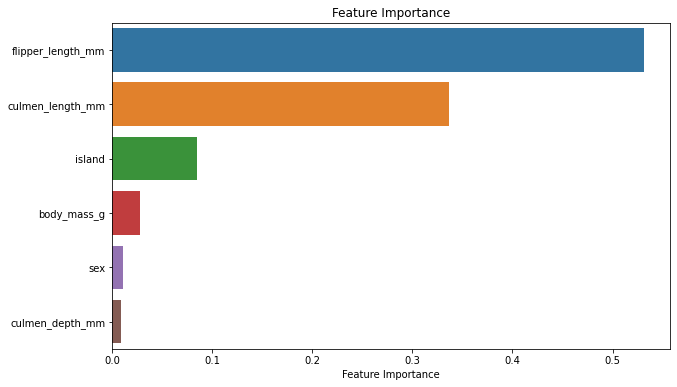

In [47]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Random Forest

In [48]:
# bootstrap ve n_estimater overfottinge engelliyor

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
help(RandomForestClassifier)

#DT ile bircogu ayni


#n_estimator agac sayisi,defaltu 100 dür,ama 64 ve 128 i de denmekte fayda var denir
#burda 100 tane agac olusturuyor,ve herbirine göre tahminlerde bulunuyor,

#max_features DT de None di, yani 9tane ise,9una birden bakip en yüksek scorla feasturesi seciyor, sonra yine 9dan seciyor
#buda varyansi arttiriyor

#9 featuresli varsa, hep 3 erli alip,onlardan en iyisini seciyor,her zaman 3 erli alip,o 3 tanenin en iyisine devam ediyor
#max features,8 features varsa karekökünü 2,7 ise, bunu 2 olarak ali,yani 3 e yuvarlamaz
#9 taneden best 3 tane featuresi seciyor,ve root node'u olusturuyor, asagi indigi zamanda yine 9 features 
#en iyi score yeni gain'e sahip featuresleri alip

#bootstrap, datanin 2/3 ü üzerinden subsubset seciyor,default Treu
# 3 farkli yontemle belirleyebiliyoruz feature sayisini ya n in karekoku, yada 2 tabanindaki logaritma n ya da n/3 , genelde karekokunu aliyorlar

#cok rastgelelik oldugu icin,ezber yapamiyor

#criterium icin,bulundugu bölmedeki yanlis hesaplamalain degerini kücültmeye calisiyordu entropy gini sifira yakin yapmaya calisiyoruz

#min_sample_split.bir yapragin bölünebilmesi icin gerekli sample sayisi


#class_weigt 

#max_sample defaultu nan ve bu durumda bütün datayi aliyor,eger biz buna 0.80 dersek ,bu durumdan sonra %80 nin 2/3 ünü alip
#ilerliyor



Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


__PARAMETERS__

In [51]:
rf_model = RandomForestClassifier(random_state=101)  #defaultlarla bir model kuruyoruz
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [52]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

#randomForeste crosslu degerler daha büyük cikti

test_accuracy           0.995833
test_precision_micro    0.995833
test_recall_micro       0.995833
test_f1_micro           0.995833
dtype: float64

### RF Model Feature Importance

In [53]:
# en önemli yer burasu diyebiliriz, hangi featureslerin daha önemli oldugu burdan belli oluyor

In [54]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

#

,Feature Importance
culmen_length_mm,0.364040
flipper_length_mm,0.228925
body_mass_g,0.152599
culmen_depth_mm,0.142287
island,0.105742
sex,0.006407


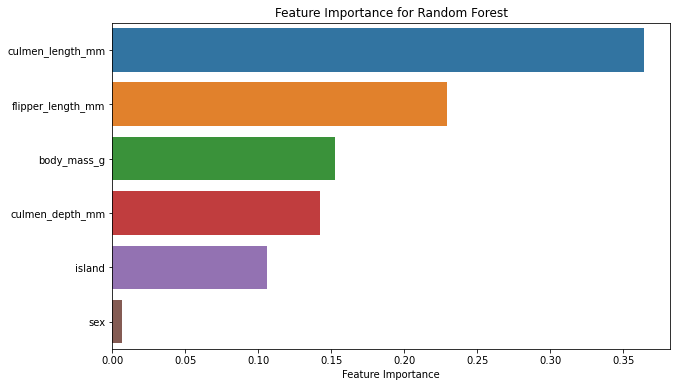

In [55]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

In [56]:
pd.concat([rf_feature_imp, dt_feature_imp], axis=1)  #features importance ilerleyen kisimlarda kod olarak kullanmayacak

#ilki random forest,digeri DT den gelen degerler
#flipper lengti azaltmis,iyi olmus zaten flipperi düsürünce daha iyi bir score almistik

#DT flipperi önemli saymisti, Random ise onun degerini biraz daha düsürmüs
#DT de ilk baslayacagi node flipper seciyor,
#ama RF de random olarak 3 features secer,ve o aldigi 3ünden ben iyi ile basliyor,ve bu ilk basamagi 100 agac icin yapiyor
# ve bir asagi inice yine 100 agac icin random 3 er tane seciyor,ve o sectigi 3 tane icin,en iyi deger olani seciyor,
#e en son yine en iyi 

,Feature Importance,Feature Importance
culmen_length_mm,0.364040,0.336093
flipper_length_mm,0.228925,0.531201
body_mass_g,0.152599,0.028136
culmen_depth_mm,0.142287,0.009044
island,0.105742,0.084673
sex,0.006407,0.010853


## Understanding Hyperparameters

In [57]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[1], feature_names=X.columns, #hoca 0 yazdi birde Xcolumda agacta sütun adlari gözüksün diye
          class_names=df.species.unique(),
          filled = True,
          fontsize = 8);

          #bu classification_reportu ve tree yi cikti olarak veriyor

In [58]:
pruned_tree = RandomForestClassifier()  #bir model kurduk
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()



Test Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



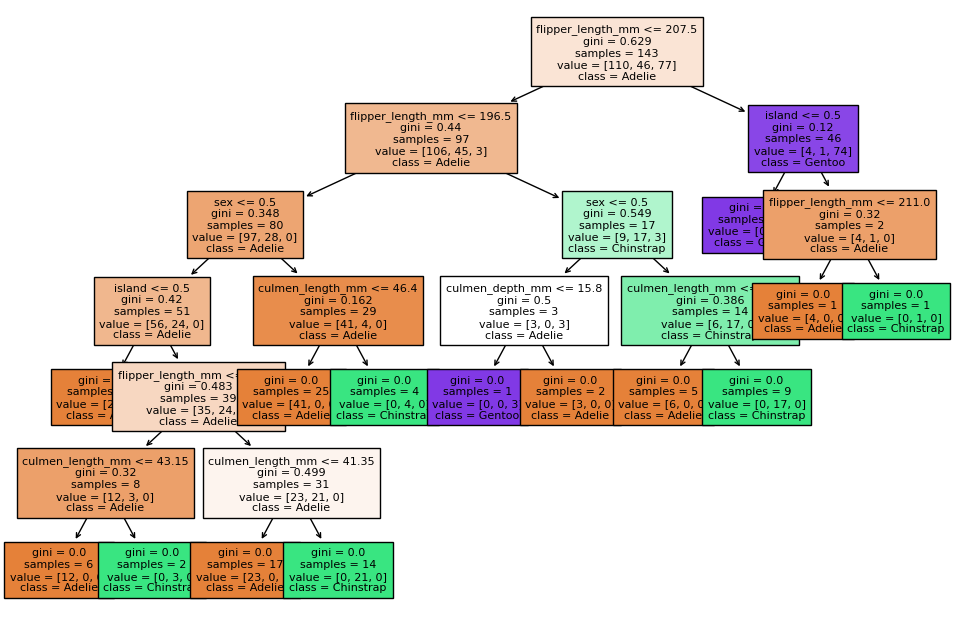

In [59]:
report_model(pruned_tree)

In [60]:
# her agac icin bir samplenin tahminini yapiyor, ve her bir tahmine esit deger veriyor,
# XGBOOSt gibi yanlis verdigine fazla agirlik vermiyor
#en cok adel mi chinstrap mi almissa onun degeri olarak en yüksek defa secileni veriyor

In [61]:
# random olarak 3 tane features secti ve onlardan en iyi olarak en bastaki secti.
#her bir adim icin, 100 agactan gelen degerleri birlestiriyor, oraya hangi degerin sonucu fazla cikarsa o adima onu koyuyor

In [62]:
#

## Prediction

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [64]:
observations = {"island": ["Torgersen", "Biscoe"], "culmen_length_mm":[35, 48], "culmen_depth_mm":[15, 20],
               "flipper_length_mm":[180, 210], "body_mass_g":[3000, 4600], "sex":["FEMALE", "MALE"]}

               #bunu predict yapalim

In [65]:
obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,180,3000,FEMALE
1,Biscoe,48,20,210,4600,MALE


In [66]:
obs[cat] 

,island,sex
0,Torgersen,FEMALE
1,Biscoe,MALE


In [67]:
obs[cat] = enc.transform(obs[cat]) #burda encoder yapacagiz, cat bizim categoric degerleri cagiriyor,yukarda tanimlamistik
obs

#obs icindeki categoricleri getir,icinde biraz yukarda vardi,tahmin etmemizi istedigimiz yerde
#burda sadece transform ediyorum, cünkü zaten yukarda fit etmistik

#asagida Torgessen ve biscoe yi sayilara cevirdi

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,35,15,180,3000,0.0
1,0.0,48,20,210,4600,1.0


In [68]:
pred = rf_model.predict(obs)
pred

array(['Adelie', 'Gentoo'], dtype=object)

## Inverse transform

In [69]:
obs[cat] = enc.inverse_transform(obs[cat])
obs

#bu sekilde yapinca eski haline ceviriyor
#eger encoder yapilmis olanlarin gercekte hangi degerler oldugunu görmek istersek bu sekilde yapiyoruz

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,180,3000,FEMALE
1,Biscoe,48,20,210,4600,MALE


In [70]:
pred = pd.Series(pred).rename("prediction")

In [71]:
pd.concat([obs, pred], axis=1)

#burda sex e kadar olan yer bizim verimiz sex te bu iki veriden yaptigi tahminler 

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,prediction
0,Torgersen,35,15,180,3000,FEMALE,Adelie
1,Biscoe,48,20,210,4600,MALE,Gentoo


## Evaluating ROC Curves and AUC

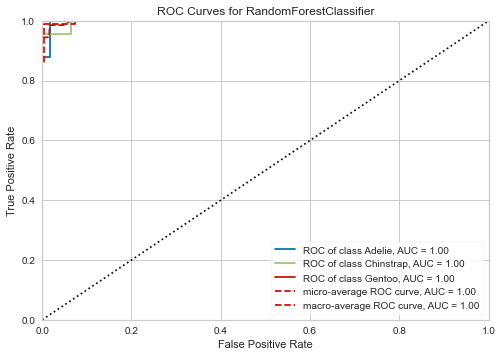

In [72]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

## DT and RF Scoring for diabetes dataset

In [73]:
df = pd.read_csv("diabetes.csv")  

In [74]:
df.head()

# Pregnancies düsük sayisi olabilir
#hedef class'imiz 1.yani seker hastasi 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
df.Outcome.value_counts()

#imbalance olabilir diye sinyali cakiyor
#

0    500
1    268
Name: Outcome, dtype: int64

## Train | Test Split and Scalling

In [77]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]  

#hepsi nümeric oldugu icin encoder islemi yapmayacagiz

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Modelling and Model Performance

### Decision Tree

In [80]:
dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

In [81]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=101)

In [82]:
eval_metric(dt_model, X_train, y_train, X_test, y_test) 

# overfit var 
#train basarili ama test te basari düsük

Test_Set
[[89 35]
 [20 48]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.76       124
           1       0.58      0.71      0.64        68

    accuracy                           0.71       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.71      0.72       192


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



__Cross Validate__

In [83]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

#yukarda düsük cikti ama biz yine bir CV ile bakalim

test_accuracy     0.673533
test_precision    0.540205
test_recall       0.525000
test_f1           0.529386
dtype: float64

__GridSearch__

DT nin GridSearch'ü

In [84]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],    #None= Butun feature' lari kullan
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [85]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best

In [86]:
dt_grid_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

In [87]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

#scorlar arasinda uyum var, Overfitting yok ama basarisi düsük,yani güvenilir bir model,overfitting yok

Test_Set
[[50 74]
 [10 58]]
              precision    recall  f1-score   support

           0       0.83      0.40      0.54       124
           1       0.44      0.85      0.58        68

    accuracy                           0.56       192
   macro avg       0.64      0.63      0.56       192
weighted avg       0.69      0.56      0.56       192


Train_Set
[[159 217]
 [ 19 181]]
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       376
           1       0.45      0.91      0.61       200

    accuracy                           0.59       576
   macro avg       0.67      0.66      0.59       576
weighted avg       0.74      0.59      0.58       576



__Cross Validate__

In [88]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101, 
                 max_depth= 5,
                 max_features= 3,
                 min_samples_leaf= 2,
                 min_samples_split= 9,
                 splitter= 'random')

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.578342
test_precision    0.470387
test_recall       0.825000
test_f1           0.574327
dtype: float64

In [89]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

In [90]:
#balanc data olsa ROC cizecektik

In [91]:
#Stratify Classification ornek:100 kisilik okuldan rastgele 10 ogrenci secmek yerine 
# 60 kiz ogrenciden 6 kiz ogrenci, 40 erkek ogrenciden 4 erkek ogrenci secmek rastegele.
#Her alt gruptan ayni yuzde ile rastgele secmek

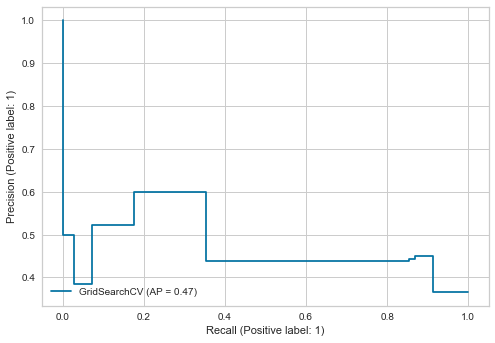

In [92]:
plot_precision_recall_curve(dt_grid_model, X_test, y_test);

#recall arttikca precision basarisi,azalmis,yani bircok kisiye 1 demeye baslamis, belki bundan dolayi recall
#artmis oluyor


### Random Forest

In [93]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)
#normal bir RF kuruyoruz

In [94]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [95]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

#burda yine Overfitting var,sebebi datanin kücük olmasindan kaynaklaniyor

Test_Set
[[102  22]
 [ 27  41]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       124
           1       0.65      0.60      0.63        68

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



__Cross Validate__

In [96]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.753479
test_precision    0.700727
test_recall       0.565000
test_f1           0.614788
dtype: float64

__Grid Search__

In [97]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [98]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total

In [99]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [100]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[86 38]
 [16 52]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       124
           1       0.58      0.76      0.66        68

    accuracy                           0.72       192
   macro avg       0.71      0.73      0.71       192
weighted avg       0.75      0.72      0.72       192


Train_Set
[[294  82]
 [ 35 165]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       376
           1       0.67      0.82      0.74       200

    accuracy                           0.80       576
   macro avg       0.78      0.80      0.79       576
weighted avg       0.82      0.80      0.80       576



__Precision_Recall_Curve__

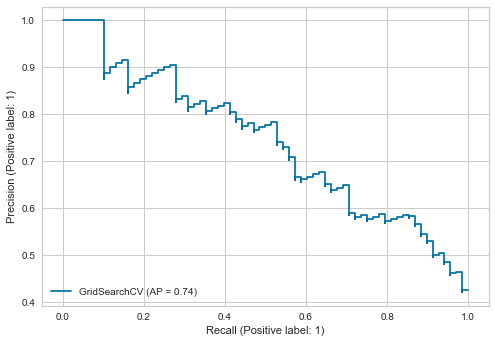

In [101]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

In [102]:
#bu diabetes datamizi daha önce Logistic ,SVM ve RF te bulduk bunlardan en iyi sonuc recall 
#logisticte ciktigi icin, Logistic almaliyiz

In [103]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(rf_grid_model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.4s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.4s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.4s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64; total

test_accuracy     0.758772
test_precision    0.638434
test_recall       0.760000
test_f1           0.688751
dtype: float64